# Basic Assignment

In [51]:
import nltk
from nltk.corpus import brown
import numpy as np
from nltk.corpus import brown, stopwords
import string

from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
from scipy.sparse import coo_matrix,lil_matrix
from collections import Counter

puncs = [p for p in string.punctuation]
nltk.download('stopwords')
stopwords = stopwords.words('english')

nltk.download('brown')
bw = brown.words()
print(bw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [53]:
print(len(bw))

1161192


In [55]:
def if_contains(sett,word):
  for sign in sett:
    if sign in word:
      return True
  return False

In [56]:
import re
bw = [w.lower() for w in bw if not if_contains(puncs,w) and w not in stopwords]

In [57]:
print(len(bw))

556761


In [58]:
counts = Counter(bw)

In [59]:
a = list(counts.items())
a.sort(reverse=True, key=lambda tup: tup[1]) #https://stackoverflow.com/questions/2290962/python-how-to-get-sorted-count-of-items-in-a-list
a = a[:5000]

In [60]:
print(a[:5])
print(a[-5:])

[('the', 7258), ('i', 5161), ('one', 3292), ('he', 2982), ('would', 2714)]
[('daytime', 19), ('amen', 19), ('dim', 19), ('distances', 19), ('puzzled', 19)]


## Pairs

In [61]:
pairs = [['cord', 'smile'],
       ['rooster', 'voyage'],
       ['noon', 'string'],
       ['fruit', 'furnace'],
       ['autograph', 'shore'],
       ['automobile', 'wizard'],
       ['mound', 'stove'],
       ['grin', 'implement'],
       ['asylum', 'fruit'],
       ['asylum', 'monk'],
       ['graveyard', 'madhouse'],
       ['glass', 'magician'],
       ['boy', 'rooster'],
       ['cushion', 'jewel'],
       ['monk', 'slave'],
       ['asylum', 'cemetery'],
       ['coast', 'forest'],
       ['grin', 'lad'],
       ['shore', 'woodland'],
       ['monk', 'oracle'],
       ['boy', 'sage'],
       ['automobile', 'cushion'],
       ['mound', 'shore'],
       ['lad', 'wizard'],
       ['forest', 'graveyard'],
       ['food', 'rooster'],
       ['cemetery', 'woodland'],
       ['shore', 'voyage'],
       ['bird', 'woodland'],
       ['coast', 'hill'],
       ['furnace', 'implement'],
       ['crane', 'rooster'],
       ['hill', 'woodland'],
       ['car', 'journey'],
       ['cemetery', 'mound'],
       ['glass', 'jewel'],
       ['magician', 'oracle'],
       ['crane', 'implement'],
       ['brother', 'lad'],
       ['sage', 'wizard'],
       ['oracle', 'sage'],
       ['bird', 'crane'],
       ['bird', 'cock'],
       ['food', 'fruit'],
       ['brother', 'monk'],
       ['asylum', 'madhouse'],
       ['furnace', 'stove'],
       ['magician', 'wizard'],
       ['hill', 'mound'],
       ['cord', 'string'],
       ['glass', 'tumbler'],
       ['grin', 'smile'],
       ['serf', 'slave'],
       ['journey', 'voyage'],
       ['autograph', 'signature'],
       ['coast', 'shore'],
       ['forest', 'woodland'],
       ['implement', 'tool'],
       ['cock', 'rooster'],
       ['boy', 'lad'],
       ['cushion', 'pillow'],
       ['cemetery', 'graveyard'],
       ['automobile', 'car'],
       ['midday', 'noon'],
       ['gem', 'jewel']]

In [62]:
rg65 = ['smile',
 'voyage',
 'string',
 'furnace',
 'shore',
 'wizard',
 'stove',
 'implement',
 'fruit',
 'monk',
 'madhouse',
 'magician',
 'rooster',
 'jewel',
 'slave',
 'cemetery',
 'forest',
 'lad',
 'woodland',
 'oracle',
 'sage',
 'cushion',
 'shore',
 'wizard',
 'graveyard',
 'rooster',
 'woodland',
 'voyage',
 'woodland',
 'hill',
 'implement',
 'rooster',
 'woodland',
 'journey',
 'mound',
 'jewel',
 'oracle',
 'implement',
 'lad',
 'wizard',
 'sage',
 'crane',
 'cock',
 'fruit',
 'monk',
 'madhouse',
 'stove',
 'wizard',
 'mound',
 'string',
 'tumbler',
 'smile',
 'slave',
 'voyage',
 'signature',
 'shore',
 'woodland',
 'tool',
 'rooster',
 'lad',
 'pillow',
 'graveyard',
 'car',
 'noon',
 'jewel',
 'cord',
 'rooster',
 'noon',
 'fruit',
 'autograph',
 'automobile',
 'mound',
 'grin',
 'asylum',
 'asylum',
 'graveyard',
 'glass',
 'boy',
 'cushion',
 'monk',
 'asylum',
 'coast',
 'grin',
 'shore',
 'monk',
 'boy',
 'automobile',
 'mound',
 'lad',
 'forest',
 'food',
 'cemetery',
 'shore',
 'bird',
 'coast',
 'furnace',
 'crane',
 'hill',
 'car',
 'cemetery',
 'glass',
 'magician',
 'crane',
 'brother',
 'sage',
 'oracle',
 'bird',
 'bird',
 'food',
 'brother',
 'asylum',
 'furnace',
 'magician',
 'hill',
 'cord',
 'glass',
 'grin',
 'serf',
 'journey',
 'autograph',
 'coast',
 'forest',
 'implement',
 'cock',
 'boy',
 'cushion',
 'cemetery',
 'automobile',
 'midday',
 'gem']

## Bigram

In [63]:
w_set = [aa[0] for aa in a]
w_set.extend(rg65)
w_set = list(set(w_set))

In [64]:
len(w_set)

5030

In [65]:
from nltk.util import ngrams
def compute_bigram(word_set):
    word2idx = {}
    for i,w in enumerate(word_set):
      word2idx[w] = i
    # matrix = np.zeros((len(word_set), len(word_set)))
    bigrams_counts = Counter(ngrams(brown.words(), 2))
    # bigrams_counts = Counter(ngrams(bw, 2))
    
    # M1 = lil_matrix((len(word_set), len(word_set)))
    M1 = np.zeros((len(word_set), len(word_set)))
    for bigram in bigrams_counts.keys():
        if bigram[1].lower() in word_set and bigram[0].lower() in word_set:
          M1[word2idx[bigram[0].lower()],word2idx[bigram[1].lower()]] = bigrams_counts[bigram]
    return M1,word2idx


In [66]:
import math
def compute_pmi(M1,word_set):
  
  rs = M1.sum(axis=1).transpose()
  cs =  M1.sum(axis=0)
  s = M1.sum()

  M1_plus = np.zeros((len(word_set), len(word_set)))
  # M1_plus = lil_matrix((len(word_set), len(word_set)))
  for i in range(len(word_set)):
    for j in range(len(word_set)):
      if M1[i,j]!=0 and rs[i]!=0 and cs[j]!=0:
        val = math.log2(M1[i,j] * s) - math.log2(rs[i] * cs[j])
        M1_plus[i, j] = max(val, 0)

  return  M1_plus
  

In [67]:
M1,word2idx = compute_bigram(w_set)

In [68]:
M1_plus = compute_pmi(M1,w_set)

In [69]:
np.isnan(M1_plus).any()

False

## PCA

In [70]:
M2_10_pca = PCA(n_components=10)
M2_10 = M2_10_pca.fit_transform(M1_plus)
M2_100_pca = PCA(n_components=100)
M2_100 = M2_100_pca.fit_transform(M1_plus)
M2_300_pca = PCA(n_components=300)
M2_300 = M2_300_pca.fit_transform(M1_plus)


In [71]:
M2_300.shape

(5030, 300)

In [72]:
s = [0.02, 0.04, 0.04, 0.05, 0.06, 0.11, 0.14, 0.18, 0.19, 0.39, 0.42,
       0.44, 0.44, 0.45, 0.57, 0.79, 0.85, 0.88, 0.9 , 0.91, 0.96, 0.97,
       0.97, 0.99, 1.  , 1.09, 1.18, 1.22, 1.24, 1.26, 1.37, 1.41, 1.48,
       1.55, 1.69, 1.78, 1.82, 2.37, 2.41, 2.46, 2.61, 2.63, 2.63, 2.69,
       2.74, 3.04, 3.11, 3.21, 3.29, 3.41, 3.45, 3.46, 3.46, 3.58, 3.59,
       3.6 , 3.65, 3.66, 3.68, 3.82, 3.84, 3.88, 3.92, 3.94, 3.94]

In [73]:


M1_sim = []
M1p_sim = []
M2_10_sim = []
M2_100_sim = []
M2_300_sim = []

worda = [pair[0] for pair in pairs]
wordb = [pair[1] for pair in pairs]
for i in range(len(pairs)):
  # print(worda[i],wordb[i])
  M1_sim.append(cosine_similarity(M1[word2idx[worda[i]]].reshape(1, -1),M1[word2idx[wordb[i]]].reshape(1, -1))[0][0])
  M1p_sim.append(cosine_similarity(M1_plus[word2idx[worda[i]]].reshape(1, -1),M1_plus[word2idx[wordb[i]]].reshape(1, -1))[0][0])
  M2_10_sim.append(cosine_similarity(M2_10[word2idx[worda[i]]].reshape(1, -1),M2_10[word2idx[wordb[i]]].reshape(1, -1))[0][0])
  M2_100_sim.append(cosine_similarity(M2_100[word2idx[worda[i]]].reshape(1, -1),M2_100[word2idx[wordb[i]]].reshape(1, -1))[0][0])
  M2_300_sim.append(cosine_similarity(M2_300[word2idx[worda[i]]].reshape(1, -1),M2_300[word2idx[wordb[i]]].reshape(1, -1))[0][0])
  

In [74]:
len(pairs)

65

In [75]:
len(M1_sim),len(s)

(65, 65)

In [76]:

print("pearsonr for S and M1",stats.pearsonr(s, M1_sim))
print("pearsonr for S and M1+",stats.pearsonr(s, M1p_sim))
print("pearsonr for S and M2_10",stats.pearsonr(s, M2_10_sim))
print("pearsonr for S and M2_100",stats.pearsonr(s, M2_100_sim))
print("pearsonr for S and M2_300",stats.pearsonr(s, M2_300_sim))

pearsonr for S and M1 (0.31734305508228516, 0.010000522446091661)
pearsonr for S and M1+ (0.19293985349723838, 0.12359532984089408)
pearsonr for S and M2_10 (0.16557610543548068, 0.1874585436217429)
pearsonr for S and M2_100 (0.3939898505682903, 0.0011653090899399875)
pearsonr for S and M2_300 (0.3842580246736232, 0.0015768604988334147)


# Lab1

In [ ]:
!pip install gdown

In [ ]:
!gdown "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"


Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM 



In [ ]:
!gunzip 'GoogleNews-vectors-negative300.bin.gz'

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !gunzip './drive/MyDrive/GoogleNews-vectors-negative300.bin.gz'

gzip: ./drive/MyDrive/GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [25]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
# model = KeyedVectors.load_word2vec_format('./drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)

## W2V Pearson

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

w2v_sim = []

worda = [pair[0] for pair in pairs]
wordb = [pair[1] for pair in pairs]
for i in range(len(pairs)):
  # print(worda[i],wordb[i])
  w2v_sim.append(cosine_similarity(model[worda[i]].reshape(1,-1),model[wordb[i]].reshape(1,-1))[0][0])
   

In [107]:
from scipy import stats
print("pearsonr for S and W2v",stats.pearsonr(s, w2v_sim))


pearsonr for S and W2v (0.7720616125197682, 5.091065805872837e-14)


## Analogy

In [28]:
import requests
data = requests.get('http://www.fit.vutbr.cz/~imikolov/rnnlm/word-test.v1.txt')

In [97]:
lines = data.text.split('\n')
lines = lines[1:]
tasks = {}
results_w2v = {}
results_M2 = {}
task = ''
for line in lines:
  if ': ' in line:
    task = line.split(' ')[1]
    if not task in tasks.keys():
      print(task)
      tasks[task] = []
      results_w2v[task] = 0
      results_M2[task] = 0
  else:
    words = line.split(' ')
    flag = True
    for word in words: 
      if not (word in w_set):
        flag = False
    if flag:
      tasks[task].append(words)


capital-common-countries
capital-world
currency
city-in-state
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


In [106]:
summ = 0
for task in tasks.keys():
  print(task,len(tasks[task]))
  summ+=len(tasks[task])
print('sum',summ)

capital-common-countries 0
capital-world 0
currency 0
city-in-state 0
family 90
gram1-adjective-to-adverb 380
gram2-opposite 20
gram3-comparative 272
gram4-superlative 42
gram5-present-participle 272
gram6-nationality-adjective 0
gram7-past-tense 600
gram8-plural 306
gram9-plural-verbs 132
sum 2114


In [99]:
model_set = [w for w in w_set if w in model.vocab]
word2idx_model = {}
for i,w in enumerate(model_set):
  word2idx_model[w] = i

w2v_matrix = np.zeros((len(model_set),300))
for word in model_set:
    w2v_matrix[word2idx_model[word],:] = model[word].reshape(1,-1)

In [100]:
import scipy
from sklearn.metrics.pairwise import cosine_similarity

for task in tasks.keys():
  print(task)
  for words in tasks[task]:
    words = [w.lower().strip() for w in words]



    vector = model[words[2]] - model[words[0]] + model[words[1]]
    sim = cosine_similarity([vector], w2v_matrix).argsort()[0].tolist()
    
    sim.remove(word2idx_model[words[0]])
    sim.remove(word2idx_model[words[1]])
    sim.remove(word2idx_model[words[2]])

    w2v_choice = model_set[sim[-1]]
    if w2v_choice in words[:3]:
      print('w2v',w2v_choice,words)




    vector = M2_300[word2idx[words[2]]] - M2_300[word2idx[words[0]]] + M2_300[word2idx[words[1]]]
    sim = cosine_similarity([vector], M2_300).argsort()[0].tolist()
    sim.remove(word2idx[words[0]])
    sim.remove(word2idx[words[1]])
    sim.remove(word2idx[words[2]])
    M2_choice = w_set[sim[-1]]

    if M2_choice in words[:3]:
      print('M2',M2_choice,words)


    if w2v_choice.lower() == words[3].lower():
      # print('--->',w2v_choice.lower() ,words[3].lower(),words)
      results_w2v[task]+=1
    if M2_choice.lower() == words[3].lower():
      # print('--->',M2_choice.lower() ,words[3].lower(),words)
      results_M2[task]+=1
    




capital-common-countries
capital-world
currency
city-in-state
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


In [93]:
results_w2v

{'capital-common-countries': 0,
 'capital-world': 0,
 'city-in-state': 0,
 'currency': 0,
 'family': 161,
 'gram1-adjective-to-adverb': 154,
 'gram2-opposite': 7,
 'gram3-comparative': 269,
 'gram4-superlative': 60,
 'gram5-present-participle': 244,
 'gram6-nationality-adjective': 0,
 'gram7-past-tense': 565,
 'gram8-plural': 295,
 'gram9-plural-verbs': 146}

In [94]:
results_M2

{'capital-common-countries': 0,
 'capital-world': 0,
 'city-in-state': 0,
 'currency': 0,
 'family': 39,
 'gram1-adjective-to-adverb': 2,
 'gram2-opposite': 0,
 'gram3-comparative': 44,
 'gram4-superlative': 8,
 'gram5-present-participle': 38,
 'gram6-nationality-adjective': 0,
 'gram7-past-tense': 214,
 'gram8-plural': 10,
 'gram9-plural-verbs': 30}

In [105]:
w2v_syntactic_correct = 0
w2v_syntactic_num = 0
w2v_semantic_correct = 0
w2v_semantic_num = 0

M2_syntactic_correct = 0
M2_syntactic_num = 0
M2_semantic_correct = 0
M2_semantic_num = 0
for task in tasks.keys():
  if len(tasks[task])!=0:
    if 'gram' in task:
      typee = "syntactic"
      w2v_syntactic_correct+=results_w2v[task]
      w2v_syntactic_num+=len(tasks[task])
      M2_syntactic_correct+=results_M2[task]
      M2_syntactic_num+=len(tasks[task])
    else:
      typee = "semantic"
      w2v_semantic_correct+=results_w2v[task]
      w2v_semantic_num+=len(tasks[task])
      M2_semantic_correct+=results_M2[task]
      M2_semantic_num+=len(tasks[task])
    print('type :',typee,'---',task,',w2v -->',results_w2v[task]/len(tasks[task]),',M2_300 -->',results_M2[task]/len(tasks[task]))
print('-'*15)
print('W2V overall syntactic',w2v_syntactic_correct/w2v_syntactic_num)
print('W2V overall semantic',w2v_semantic_correct/w2v_semantic_num)
print('-'*15)
print('M2_300 overall syntactic',M2_syntactic_correct/M2_syntactic_num)
print('M2_300 overall semantic',M2_semantic_correct/M2_semantic_num)

type : semantic --- family ,w2v --> 0.9111111111111111 ,M2_300 --> 0.14444444444444443
type : syntactic --- gram1-adjective-to-adverb ,w2v --> 0.38421052631578945 ,M2_300 --> 0.002631578947368421
type : syntactic --- gram2-opposite ,w2v --> 0.35 ,M2_300 --> 0.0
type : syntactic --- gram3-comparative ,w2v --> 0.8088235294117647 ,M2_300 --> 0.08088235294117647
type : syntactic --- gram4-superlative ,w2v --> 0.9047619047619048 ,M2_300 --> 0.09523809523809523
type : syntactic --- gram5-present-participle ,w2v --> 0.8088235294117647 ,M2_300 --> 0.06985294117647059
type : syntactic --- gram7-past-tense ,w2v --> 0.7583333333333333 ,M2_300 --> 0.17833333333333334
type : syntactic --- gram8-plural ,w2v --> 0.8921568627450981 ,M2_300 --> 0.016339869281045753
type : syntactic --- gram9-plural-verbs ,w2v --> 0.8409090909090909 ,M2_300 --> 0.11363636363636363
---------------
W2V overall syntactic 0.7262845849802372
W2V overall semantic 0.9111111111111111
---------------
M2_300 overall syntactic 0.0

## Step 5. 
Suggest a way to improve the existing set of vector-based models in capturing word
similarities in general, and provide justifcations for your suggestion.

## Answer
Adding a loss function in training the model such that this loss function contarsts 

model[words[2]] - model[words[0]] + model[words[1]]

with the words[3]
(and random words for the negative pairs of contrastion)

# Diachronic word embedding

In [ ]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
file = open('data.pkl', 'rb')
dwe = pickle.load(file)

w = dwe['w']
d = dwe['d']
E = dwe['E']

## Method one: Distance between first and last

In [ ]:
distances_1 = []
for i in range(len(w)):
 dd = 1-cosine_similarity(np.array([E[i][0]]), np.array([E[i][-1]]))[0][0]
 distances_1.append(dd)
sorted = np.argsort(distances_1)
most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)
least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['film', 'shift', 'berkeley', 'patterns', 'perspective', 'impact', 'media', 'shri', 'van', 'approach', 'goals', 'sector', 'radio', 'computer', 'objectives', 'programs', 'techniques', 'ml', 'skills', 'mcgraw']
least_changes ['april', 'june', 'november', 'february', 'years', 'october', 'increase', 'january', 'century', 'months', 'daughter', 'december', 'god', 'september', 'feet', 'week', 'evening', 'door', 'payment', 'miles']


## Method two: Average distance of consecetive times

In [ ]:
distances_2 = []
for i in range(len(w)):
 dd = 0
 for j in range(9):
  dd += 1 -cosine_similarity([np.array(E[i][j])], [np.array(E[i][j+1])])[0][0]
 distances_2.append(dd/9)
sorted = np.argsort(distances_2)
most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)
least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['haven', 'goals', 'johnson', 'therapy', 'adams', 'wilson', 'princeton', 'martin', 'baltimore', 'wiley', 'berkeley', 'techniques', 'sector', 'ml', 'jones', 'harper', 'mcgraw', 'skills', 'computer', 'shri']
least_changes ['april', 'miles', 'november', 'september', 'january', 'december', 'february', 'university', 'vessels', 'trees', 'cent', 'solution', 'july', 'decrease', 'october', 'temperature', 'buildings', 'june', 'patients', 'blood']


## Method three: Maximum distance of consecetive times

In [ ]:
distances_3 = []
for i in range(len(w)):
 ddd = 0
 for j in range(9):
  dd =1 - cosine_similarity([np.array(E[i][j])], [np.array(E[i][j+1])])[0][0]
  ddd = max(dd,ddd)
 distances_3.append(ddd)
sorted = np.argsort(distances_3)
most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)
least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['jones', 'radio', 'implications', 'variables', 'jobs', 'procedures', 'wiley', 'therapy', 'input', 'evaluation', 'programs', 'sector', 'objectives', 'goals', 'skills', 'shri', 'mcgraw', 'ml', 'computer', 'techniques']
least_changes ['april', 'november', 'december', 'january', 'september', 'trees', 'miles', 'solution', 'feet', 'june', 'february', 'vessels', 'century', 'duties', 'cent', 'blood', 'evening', 'buildings', 'decrease', 'july']


Pearson correlations

In [ ]:
np.isnan(np.array(distances_3)).any()

False

In [ ]:
from scipy import stats
distances = [distances_1,distances_2,distances_3]
array = np.zeros((3,3))
for i in range(3):
  for j in range(3):
    if i!=j:
      array[i,j] = stats.pearsonr(distances[i],distances[j])[0]
    else:
      array[i,j] = 0
print(array)

[[0.         0.6932991  0.68926445]
 [0.6932991  0.         0.84506762]
 [0.68926445 0.84506762 0.        ]]


## Step 3
Proposed method for evaluation: check how different set of closest words have been for each word

In [ ]:
most_similar = {}
K = 10
for i in range(len(w)):
  if i%100==0:
    print(i)
  most_similar[w[i]] = [[] for l in range(10)]
  for j in range(10):
    sims = []
    matrix = np.array(E)[:,j,:]
    indexes = np.linalg.norm((matrix - E[i][j]),axis=1).argsort()
    # print(np.shape(indexes))
    sims = [w[a] for a in indexes[:K+1] if w[a]!=w[i]]
    # for k in range(len(w)):
    #   similarity = cosine_similarity([np.array(E[i][j])], [np.array(E[k][j])])[0][0]
    #   # print(similarity)
    #   sims.append((w[k],similarity))
    # sims.sort( key = lambda x : -1*x[1])
    most_similar[w[i]][j].extend(sims[:K])




0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [ ]:
most_similar[w[0]][5]

['period',
 'days',
 'interval',
 'hour',
 'years',
 'hours',
 'periods',
 'moment',
 'weeks',
 'effort']

In [ ]:
distances_4 = []
for i in range(len(w)):
  d = (K - len([a for a in most_similar[w[i]][0] if a in most_similar[w[i]][9]]))/K
  distances_4.append(d)

In [ ]:
distances_4

In [ ]:
distances = [distances_1, distances_2, distances_3, distances_4]
print([len(d) for d in distances])
array = np.zeros((4,4))
for i in range(4):
  for j in range(4):
    if i!=j:
      pr = stats.pearsonr(distances[i], distances[j])
      # print(pr)
      array[i,j] = pr[0]
    else:
      array[i,j] = 0
print(array)

[2000, 2000, 2000, 2000]
[[0.         0.6932991  0.68926445 0.43578751]
 [0.6932991  0.         0.84506762 0.21989351]
 [0.68926445 0.84506762 0.         0.23627123]
 [0.43578751 0.21989351 0.23627123 0.        ]]


## Step 4

In [ ]:
sorted = np.argsort(distances_4)
most_changes = [w[a] for a in sorted[-5:]]
print('most_changes',most_changes)
# print([distances_4[a] for a in sorted[-10:]])
m_distances = [[] for i in range(len(most_changes))]
for i in range(len(most_changes)):
  for j in range(10):
    # d = 1 - cosine_similarity([E[i][j]], [E[i][0]])[0][0]
    d = (K - len([a for a in most_similar[w[i]][j] if a in most_similar[w[i]][0]]))/K
    m_distances[i].append(d)

most_changes ['radio', 'mcgraw', 'assessment', 'sector', 'intelligence']


In [ ]:
distances_4

In [ ]:
m_distances

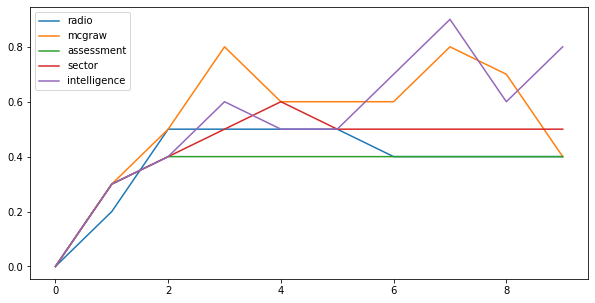

In [ ]:
from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 5]
for i in range(len(m_distances)):
  plt.plot(m_distances[i], label=most_changes[i])
plt.legend()
plt.show()